# Exploring Information Theory in Experimental Design

Welcome to this tutorial on the basics of information theory and its practical application in optimizing experimental design! In this session, we'll delve into the fundamental concepts of information content, entropy, conditional entropy, and mutual information, all within the context of a synthetic working memory experiment.

#### Why should you even bother about Information Theory when designing an experiment?

Imagine you're designing an experiment to understand how human working memory performs under conditions like the amount of information to remember. How do you choose the amount participants should remember? How do you quantify the information gained from each trial about this cognitive system under study? This is where information theory steps in.

Information theory provides a powerful framework for measuring and quantifying uncertainty, information content, and the relationships between variables. In this tutorial, we'll guide you through the basics and show you how to apply these concepts in experimental design.

#### Optimizing the experimental design for a working memory experiment

Our context for learning will be a synthetic working memory experiment. 

In this experiment, participants (experimental units) are asked to remember a sequence of the length *L* which contains random numbers. 

We, as the researchers, have control about the sequence length *L*. This is the factor in our experiment.

The participants response will be categorized either being *Correct* (1) or *False* (0).

#### Tutorial Overview

In this tutorial you will learn to:
- Set up a synthetic working memory experiment (remember what you learned in the tutorial about synthetic experiments)
- Compute the information content and the entropy of the responses
- Choose new factor levels based on our knowledge of the entropy
- Compute the mutual information between our model parameters, the factors and the given responses

## Import of libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys

# append the path of the project directoy where the modules which we'll need are stored to the search path
sys.path.append('../')

## Setup of the synthetic experiment

In the first section we are going to set up the synthetic experiment by defining the experimental unit.

You can think of each unit being one participant.

Remember what you learned in the tutorial about synthetic experimentation where you implemented everything by yourselves.

But instead of implementing everything on our own, we just take the already implemented experimental_unit class, a ground truth and a noise method. You can find these elements in the synthetic.py file.

Import the synthetic file with all components.

In [33]:
import resources.synthetic as synthetic

ground_truth = synthetic.sigmoid_ground_truth
noise = synthetic.noise

# make a list of parameters which are passed to the experimental_unit class
# you can either do it by hand or for automatic generation use e.g. numpy.linspace or numpy.random.uniform
parameters = np.random.uniform(1, 10, 100)

units = []
# create a list of experimental units
for p in parameters:
    units.append(synthetic.experimental_unit(problem_solver=ground_truth, noise=noise, parameters=[p], noise_level=1))

The ground truth method synthetic.sigmoid_ground_truth will give you a curve of sigmoidal shape as you know it already from the presented working memory experiment from the lecture.

In this case the ground truth does not give directly the response because it just tells you the probability for remembering the sequence correctly for a sequence of sequence length *L* under a certain parameter *p*.

We have to wrap it first into a method that transforms these probabilities into a binary response (remember: 0 = correct; 1 = false).

In [4]:
# make a wrapper for the ground truth method
# this is needed to transform the probability given by the ground truth into a binary response (0: False or 1: Correct)

def ground_truth_wrapper(x: float, parameters: list[float]):
    # give a random response based on the probability given by the ground truth
    # get a random variable between 0 and 
    
    # make sure that the inputs of the wrapper are same ones as for the ground truth
    
    # define a random variable which we will check against the probability given by the ground truth to decide if we return 1 or 0
    random_variable = np.random.uniform(0, 1)
    # check if the random variable is smaller than the probability given by the ground truth -> return 1; else return 0
    # example: if the probability given by the ground truth is 0.7, we return 1 in 70% of the cases and 0 in 30% of the cases
    if random_variable < ground_truth(x, parameters):
        return 1
    else:
        return 0

Let's test the wrapper and see what it actually does!

First, we are going to set up one participant by simply defining a parameter and check the probabilities of answering correctly.

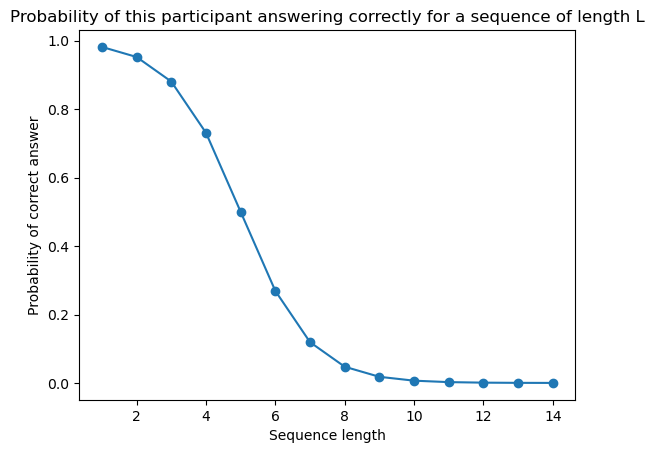

In [5]:
sequence_lengths = np.arange(1, 15)  # sequence lengths for which we want to know the probability of correct answer
parameter = 5  # participant parameter

# collect the probabilities for each sequence length
probs = np.zeros(len(sequence_lengths))
for i, l in enumerate(sequence_lengths):
    probs[i] = synthetic.sigmoid_ground_truth(l, parameter)

# plot the ground truth probability curve    
plt.plot(sequence_lengths, probs, '-o')
plt.ylabel('Probability of correct answer')
plt.xlabel('Sequence length')
plt.title('Probability of this participant answering correctly for a sequence of length L')
plt.show()

Now we are going to take this ground truth and wrap it into the previously defined method that actually returns a binary response based on the response probability.

In [6]:
l = 6 # sequence length
for i in range(10):
    binary_response = ground_truth_wrapper(l, parameter)
    print(f'The given response is: {binary_response};\tThe actual probability of correct answer is: {np.round(synthetic.sigmoid_ground_truth(l, parameter), 2)}')

The given response is: 1;	The actual probability of correct answer is: 0.27
The given response is: 1;	The actual probability of correct answer is: 0.27
The given response is: 1;	The actual probability of correct answer is: 0.27
The given response is: 0;	The actual probability of correct answer is: 0.27
The given response is: 1;	The actual probability of correct answer is: 0.27
The given response is: 0;	The actual probability of correct answer is: 0.27
The given response is: 0;	The actual probability of correct answer is: 0.27
The given response is: 0;	The actual probability of correct answer is: 0.27
The given response is: 0;	The actual probability of correct answer is: 0.27
The given response is: 0;	The actual probability of correct answer is: 0.27


According to probability theory, our wrapper should now approximate the correct probabilities for $n_\text{repitions}\rightarrow\inf$.

Let's check if we get the correct probabilities returned by the wrapper for many repetitions.

First, we are going to collect the responses of the defined participant for each sequence length $n_\text{repitions}$ times.

In [7]:
n_repetitions = 100  # number of repetitions for each sequence length
binary_response = np.zeros((len(sequence_lengths), n_repetitions))

# collect the responses from the wrapper method
# we are going to repeat this 10 times for each sequence length
for i, l in enumerate(sequence_lengths):
    for r in range(n_repetitions):
        binary_response[i, r] = ground_truth_wrapper(l, parameter)

Now we print the solution in a table to check how the found probability for answering correctly behaves

In [8]:
# print how often the participant answered correctly for each sequence length
# make a table for that
print(f'{"Sequence length":<20}{"# Correct answers":<20}{"Found probability":<20}{"Actual probability":<20}')
for i, l in enumerate(sequence_lengths):
    print(f'{l:<20}{np.sum(binary_response[i, :]):<20}{np.round(np.sum(binary_response[i, :]) / n_repetitions, 2):<20}{np.round(probs[i], 2):<20}')

Sequence length     # Correct answers   Found probability   Actual probability  
1                   100.0               1.0                 0.98                
2                   95.0                0.95                0.95                
3                   94.0                0.94                0.88                
4                   70.0                0.7                 0.73                
5                   52.0                0.52                0.5                 
6                   23.0                0.23                0.27                
7                   12.0                0.12                0.12                
8                   7.0                 0.07                0.05                
9                   2.0                 0.02                0.02                
10                  0.0                 0.0                 0.01                
11                  0.0                 0.0                 0.0                 
12                  0.0     

Does the result look good? Try some more repitions to see how the found probability approximates the actual one.

In the next step we will make a bunch of experimental units with the implemented wrapper function and the set of parameters defined in the beginning.

Unlike the last tutorial for synthetic experimentation, we won't need any noise this time because our wrapper gives already a randomized response by generating a random number which is simply checked against the given probabilities.

In [9]:
# defining an experimental unit with the wrapper method
unit = []
for p in parameters:
    unit.append(
        synthetic.experimental_unit(
            problem_solver=ground_truth_wrapper, 
            noise=noise, 
            parameters=parameter, 
            noise_level=0
            )
        )

print(f'Number of experimental units: {len(unit)}')
print(f'The response of one of the experimental units is: {unit[0].step(5, None)}')

Number of experimental units: 100
The response of one of the experimental units is: 0.0


Does your setup look good?

If that's the case, great! Then we can collect the data.

In [10]:
sequence_lengths = np.arange(1, 12)  # sequence lengths which we are going to use
n_repitions = 10  # number of repetitions for each sequence length

# the dataset is a 3D array with the following dimensions:
# 1. number of experimental units
# 2. number of sequence lengths
# 3. number of repetitions
dataset = np.zeros((len(unit), len(sequence_lengths), n_repitions))

# collect the responses from the experimental units
for i, u in enumerate(unit):
    for j, l in enumerate(sequence_lengths):
        for r in range(n_repitions):
            dataset[i, j, r] = u.step(l, None)

Let's check how our dataset looks like

In [11]:
print(f'The shape of the dataset is: {dataset.shape}')
print(dataset)

The shape of the dataset is: (100, 11, 10)
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 0. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 0. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 0. 1.]
  [1. 0. 0. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 0. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0.

Does it look good? 

Then you have successfully finished the experimental setup and we can move on the application of the information theoretic principles you learned about in the lecture.

## Applied information theory for experimental design

In this section you will apply and compute the information theoretic concepts you learned about in the lecture.

This includes information content, entropy, conditional entropy and mutual information.

You will learn about:
- the information content of obtained samples
- the overall entropy of the whole dataset
- the conditional entropy i.e., the remaining entropy of the responses when the condition is given
- the mutual information between the respones, the sequence lengths and a model which we are going to set up

### Information content

In this section we are going to compute the information content of a few samples first in general and then based on the sequence length.

To do so, we have to compute the marginal probability for answering correctly and wrong $p(x)$ and then also the conditional probability $p(x|l)$ first.

In [12]:
# compute the marginal probability of a correct answer
# since we have a binary response, we can compute the marginal probability by taking the mean of the dataset
marginal_prob = np.mean(dataset)

print(f'The marginal probability of a correct answer is: {marginal_prob}')

# compute the conditional probability of a correct answer given a sequence length
# we can do that by computing the mean of the dataset 
# first along the repition dimension -> This gives us the mean response given by each experimental unit for each sequence length
# second along the experimental unit dimension -> This gives us the mean response for each sequence length over all experimental units
conditional_prob = np.mean(dataset, axis=2)
conditional_prob = np.mean(conditional_prob, axis=0)

print('The conditional probability of a correct answer given a sequence length is:')
for i, l in enumerate(sequence_lengths):
    print(f'{l}: {np.round(conditional_prob[i], 2)}')

The marginal probability of a correct answer is: 0.4101818181818182
The conditional probability of a correct answer given a sequence length is:
1: 0.98
2: 0.94
3: 0.87
4: 0.73
5: 0.51
6: 0.28
7: 0.12
8: 0.05
9: 0.02
10: 0.01
11: 0.01


Now we'll compute the information content of the possible responses.

In [13]:
# compute the overall information content for correct and wrong answers
# use the computed marginal probability for that
information_content_correct = -np.log2(marginal_prob)
print(f'The information content of a correct answer is: {information_content_correct}')

information_content_wrong = -np.log2(1 - marginal_prob)
print(f'The information content of a wrong answer is: {information_content_wrong}')

# compute the conditional information content for correct and wrong answers
# use the computed conditional probabilities for that
conditional_information_content_correct = -np.log2(conditional_prob)
conditional_information_content_wrong = -np.log2(1 - conditional_prob)

print('The information content of correct and wrong answers given a sequence length are:')
print('Length\tCorrect\tWrong')
for i, l in enumerate(sequence_lengths):
    print(f'{l}\t{np.round(conditional_information_content_correct[i], 2)}\t{np.round(conditional_information_content_wrong[i], 2)}')

The information content of a correct answer is: 1.2856645509005906
The information content of a wrong answer is: 0.7616577990821114
The information content of correct and wrong answers given a sequence length are:
Length	Correct	Wrong
1	0.03	5.51
2	0.09	4.08
3	0.19	2.99
4	0.46	1.87
5	0.97	1.03
6	1.86	0.47
7	3.02	0.19
8	4.24	0.08
9	5.97	0.02
10	7.16	0.01
11	7.16	0.01


Are the information contents like you would have them expected to be?

You should find that according to the response probabilities, the more likely ones have the lower information content.

Further, according to the response probabilities per sequence length, you should find that the shorter the presented sequence is, the higher is the information content of a wrong response and vice versa.

What could this mean for our experimental setting?

### Entropy and conditional entropy

Here we are going to compute the entropy of the whole dataset, which is the expected information content per response.

To do so, we have to compute the average information content of each response.

In [14]:
# compute the entropy of the response distribution
# use the formula from the lecture
entropy = -marginal_prob * np.log2(marginal_prob) - (1 - marginal_prob) * np.log2(1 - marginal_prob)
print(f'The entropy of the response distribution is: {entropy}')

The entropy of the response distribution is: 0.9765958412825639


What does this result tell you about the distribution and the expected information content?

In the binary case, an entropy $H(X)\neq 1$ indicates that the responses have an unbalanced probability and that the more likely one occures more frequently.

If the entropy is very unbalanced, that might be a hint for adapting our sampling strategy so we gather more samples of the less likely response.

Let's compute now the conditional entropy and check what this one tells us about our dataset.

Remember the formula from the lecture.

In [15]:
# compute the conditional entropy as the sum of the conditional information content

# first, compute the joint probability of the response and the sequence length for each sample
# we can do that by finding the amount of occurrences of each combination of response and sequence length 
# and divide it by the total number of samples
joint_prob = np.zeros((len(sequence_lengths), 2))

for i, l in enumerate(sequence_lengths):
    joint_prob[i, 0] = np.sum(dataset[:, i, :] == 0) / dataset.size
    joint_prob[i, 1] = np.sum(dataset[:, i, :] == 1) / dataset.size

# now we are going to compute the conditional probability of the response given the sequence length
# we can do that by applying bayes rule: p(x, y) = p(x)*(y|x) = p(y)*(x|y)
prob_l = 1/len(sequence_lengths)
prob_x_given_l = np.zeros_like(joint_prob)
prob_x_given_l = joint_prob / prob_l 

# compute the conditional entropy as the sum of the conditional information content
# remember: in the case of a probability of 0, the log(0) would be -inf, which is not defined
# instead we can set the conditional entropy to 0 since 0*log(0) = 0
conditional_entropy = np.zeros_like(joint_prob)
for x in range(conditional_entropy.shape[1]):
    for y in range(conditional_entropy.shape[0]):
        if prob_x_given_l[y, x] == 0:
            conditional_entropy[y, x] = 0
        else:
            conditional_entropy[y, x] = -joint_prob[y, x] * np.log2(prob_x_given_l[y, x])
conditional_entropy = np.sum(conditional_entropy)
print(f'The conditional entropy for the whole dataset is: {conditional_entropy}')

The conditional entropy for the whole dataset is: 0.4358836042458382


What does this result tell us about our experiment and the collected data?

Remember that the conditional entropy tells us the remaining entropy of the responses given the conditions, which in our case are the sequence lengths.

Compare the overall response entropy with the conditional entropy. Did it change?

### Mutual information

In the last section you computed the conditional entropy, which is an indicator for remaining entropy of one random variable $X$ given another one $Y$.

Do you remember the Venn diagram from the lecture?

The mutual information $I(X,Y)$ was also computed with the conditional entropy and the overall entropy with a simple formula.
Compute the mutual information of the response and the sequence length.

In [16]:
mutual_information_response_length = entropy - conditional_entropy
print(f'The mutual information between response and sequence length is: {mutual_information_response_length}')

The mutual information between response and sequence length is: 0.5407122370367257


How high is the mutual information compared to the overall entropy?

Can you think of a way to alter the mutual information? We could for example add some noise to the response data.

Let's see how the mutual information behaves under more difficult conditions.

## Adding more noise to the data

By adding more noise to the data we can alter the information characteristics which we compute previously.

You can do so by simply flipping each response with a specified probability. Flipping means that 0 will become 1 and vice versa.

After modifying the dataset, re-run the previous cells and see how the information characteristics change. 

In [32]:
prob_flip = 0.3  # probability of flipping a response

idx = np.random.randint(0, dataset.size, int(dataset.size * prob_flip))  # get random indexes for the dataset
idx = np.unravel_index(idx, dataset.shape)  # convert the indexes to the shape of the dataset

# we flip the responses for these indexes
dataset[idx] = 1 - dataset[idx]

## Congratulations!

You've successfully finished the tutorial on the basics of information theory and how to apply them in the cognitive experimental context!

This was still a rather simple example regarding that our data had only one factor and the responses were binary.

When we are working e.g. with continuous variables things become way more complicated.

But for this case, there are already some popular libraries for optimal experimenting design and active learning which we are going to use in the next tutorial!